# Exercise 1: Fourier transform of an image  
Download the file `spt_imap_ra5h30dec-55_2008_150ghz_sfl_dr1.fits` from the course web site. This is an image of part of the sky scanned by the South Pole Telescope at a frequency of 150 GHz (in the microwave band). We will work on removing ripples from the background by using a Fourier filter technique.  

1. Use `CCDData.read` from `astropy.nddata` to read in the image and store it as a `CCDData` object. The values are temperatures in units of K, but just use `unit="adu"` for our purposes.


In [1]:
#Code Here
from astropy.nddata import CCDData
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.wcs import WCS
import numpy as np
path = r"C:\Users\eklav\OneDrive - University of Illinois - Urbana\astro_310\labs\lab20\spt_imap_ra5h30dec-55_2008_150ghz_sfl_dr1.fits"
file = CCDData.read(path,unit="adu")
(file.wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SFL' 'DEC--SFL' 
CRVAL : 82.7025 0.0 
CRPIX : 1560.5 14760.7 
CD1_1 CD1_2  : -0.00416667 0.0 
CD2_1 CD2_2  : 0.0 0.00416667 
NAXIS : 3120  3120

2. Use `Cutout2D` to cut out a 4' x 4' region centered at 05h37m33s, -57d03m22s. Pass the image WCS to `Cutout2D` so the cutout gets a WCS.


In [32]:
#Code Here
center = SkyCoord('05h37m33s', '-57d03m22s', frame='icrs')
cutout = Cutout2D(file.data, position=center,size= u.Quantity((4,4),u.deg),wcs=file.wcs)
cutout.data


array([[-1.66020200e-05, -1.37606849e-05, -9.40552782e-05, ...,
         3.05906451e-06,  1.11869915e-04,  4.32957531e-05],
       [-1.11914254e-04, -7.29651038e-06,  6.84620900e-05, ...,
         9.19211816e-05,  1.20816600e-04,  1.45958984e-04],
       [-4.57881979e-05, -1.75015695e-04, -7.38575181e-06, ...,
         6.53907337e-05,  2.53291200e-05,  5.40112123e-05],
       ...,
       [-4.10274806e-05,  1.72209596e-07,  6.28554244e-06, ...,
         8.32686637e-05,  1.57414208e-04,  1.06921281e-04],
       [ 5.03451483e-05,  4.95421591e-05,  3.86080319e-05, ...,
        -1.93272517e-05, -6.01372158e-05,  1.06068423e-04],
       [ 6.19004277e-05,  8.22212096e-05, -1.02030899e-04, ...,
         1.03152495e-04, -8.01533861e-06,  8.66310438e-05]], dtype='>f4')

3. Use `numpy.fft.rfft2` to construct the 2D real-complex transform of the cutout data.


Text(0.5, 1.0, 'Magnitude of FFT')

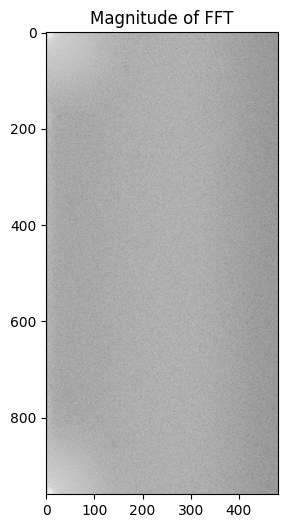

In [51]:
#Code Here
from matplotlib.colors import LogNorm

img = np.fft.rfft2(cutout.data)
img
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.imshow(np.abs(img), norm=LogNorm(), cmap='gray')  # LogNorm can be used for better contrast
ax.set_title('Magnitude of FFT')


4. Find the kx- and ky-values using `fftfreq`/`rfftfreq` and create a meshgrid from them. Use the meshgrid to compute $$\|k\|$$ at each point.


In [34]:
#Code Here
kx,ky = np.fft.fftfreq(cutout.data.shape[0]),np.fft.rfftfreq(cutout.data.shape[1])
kx,ky #kx,ky array values here
kx,ky = np.meshgrid(kx,ky,indexing='ij')
k_mod = np.sqrt(kx**2 +ky**2)
print(k_mod)

[[0.         0.00104167 0.00208333 ... 0.49791667 0.49895833 0.5       ]
 [0.00104167 0.00147314 0.00232924 ... 0.49791776 0.49895942 0.50000109]
 [0.00208333 0.00232924 0.00294628 ... 0.49792103 0.49896268 0.50000434]
 ...
 [0.003125   0.00329404 0.00375578 ... 0.49792647 0.49896812 0.50000977]
 [0.00208333 0.00232924 0.00294628 ... 0.49792103 0.49896268 0.50000434]
 [0.00104167 0.00147314 0.00232924 ... 0.49791776 0.49895942 0.50000109]]


5. Set all the Fourier components with $$\|k\| < 50$$ (number of x-points) to zero and inverse transform. Plot the original and the filtered version using the stretch below ($$f$$ denotes the unstretched image).  
$$
f \rightarrow \frac{\log{[1000(f - f_{\text{min}}) + 1]}}{\log{(1001)}}
$$

0


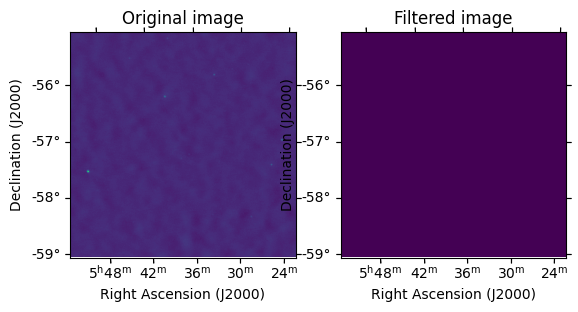

In [89]:
#Code Here
import matplotlib.pyplot as plt

threshold =  50
# NOT SURE WHY BUT THIS THRESHOLD IS THE ONLY ONE THAT GIVES CORRECT VALUES
# print(threshold)
fft_img_fil = np.where(k_mod < threshold,0,img)
print(np.argmax(fft_img_fil))
# print(fft_img_fil)
img_fil = np.fft.irfft2(fft_img_fil)

def f_strech(f):
    f_min = np.min(f)
    return np.log(1000 * (f-f_min) +1)/np.log(1001)
strech_act_img = f_strech(cutout.data)
strech_fil_img = f_strech(img_fil)
fig, axes = plt.subplots(1, 2, subplot_kw={'projection': cutout.wcs})
axes[0].imshow(strech_act_img, cmap='viridis', origin='lower')
axes[0].set_xlabel('Right Ascension (J2000)')
axes[0].set_ylabel('Declination (J2000)')
axes[0].set_title("Original image")

axes[1].imshow(strech_fil_img, cmap='viridis', origin='lower')
axes[1].set_xlabel('Right Ascension (J2000)')
axes[1].set_ylabel('Declination (J2000)')
axes[1].set_title("Filtered image")

plt.show()

# Exercise 2: unsharp masking

Apply the unsharp mask algorithm to the SPT image we worked with previously (start with the raw cutout data). Use the same cutout region, but before processing it, subtract its minimum value to make sure all values are nonnegative. For the unsharp mask, use $$ \sigma = 10 $$ (pixels), $$ t = 0.1 $$, and $$ s = 100 $$. Plot the result, using a nice colormap so that you can see the remaining background ripples and the rings around the point sources.


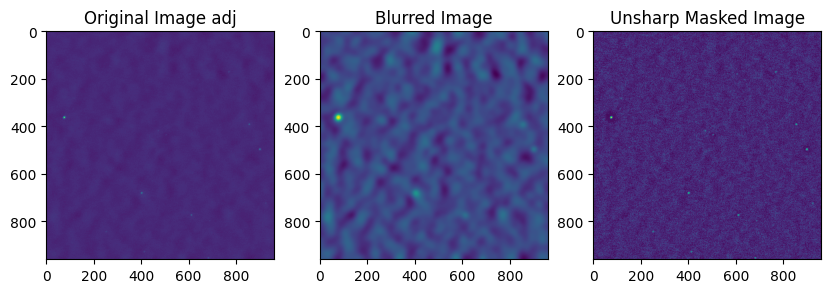

In [37]:
#Code Here
import scipy.ndimage
import scipy
import numpy as np
cutout_adj = cutout.data - np.min(cutout.data)
img_blur = scipy.ndimage.gaussian_filter(cutout_adj,sigma=10)
mask = cutout_adj - img_blur
t = 0.1
s = 100
img_unsharp_mask = np.where(mask>t * cutout_adj,cutout_adj + s * mask, cutout_adj)
str_unsharp = f_strech(img_unsharp_mask)
fig,axis = plt.subplots(1, 3,figsize = (10,10))
axis[0].imshow(f_strech(cutout_adj))
axis[0].set_title("Original Image adj")
axis[1].imshow(f_strech(img_blur))
axis[1].set_title("Blurred Image")

axis[2].imshow(str_unsharp)
axis[2].set_title("Unsharp Masked Image")

plt.show()
# I believe the images here are different from teh images in the task